<a href="https://colab.research.google.com/github/dtabuena/Accessory-Matlab-DT-Func-/blob/master/Analyze_Extra_DGC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'Get Standard Modules'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import os
from scipy.signal import butter,filtfilt
from tqdm import tqdm
import warnings
from IPython.display import clear_output
from datetime import datetime
import sys
import warnings
import shutil
from google.colab import files
warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)
clear_output(wait=False)



!pip install openpyxl
!pip install XlsxWriter


'''Get Repositories'''
try: shutil.rmtree('/content/EphysLib')
except: None

"run dtabuena's ephys notebooks"
!git clone https://github.com/dtabuena/EphysLib
to_import = [
            'ABF_Quality_Control.ipynb',
            'Basic_Ephys.ipynb',
            'Simple_ABF_tools.ipynb',
            'fun_math.ipynb',
            'importing_abfs_from_dropbox.ipynb',
            'QC_recoding_dataframe.ipynb',
            'Analyzers/input_resistance_analyzer.ipynb',
            'Analyzers/gain_analyzer.ipynb',
            'Analyzers/latencey_analyzer.ipynb',
            'Analyzers/IV_analyzer.ipynb',
            'Analyzers/Vm_analyzer.ipynb',
            'Analyzers/membrane_analyzer.ipynb',
            'Analyzers/rheobase_analyzer.ipynb',
            'Ephys_wrapper.ipynb',
            ]
for i in to_import:
    f = '/content/EphysLib/' + i
    %run $f


# try: shutil.rmtree('/content/CrispyMice')
# except: None
# !git clone https://github.com/dtabuena/CrispyMice
# to_import = ['CrispyPipelineFuncs.ipynb']
# for i in to_import:
#     f = '/content/CrispyMice/' + i
#     %run $f


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 2.5 MB/s eta 0:00:00
Cloning into 'EphysLib'...
remote: Enumerating objects: 821, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 821 (delta 165), reused 108 (delta 108), pack-reused 623
Receiving objects: 100% (821/821), 14.29 MiB | 7.92 MiB/s, done.
Resolving deltas: 100% (542/542), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 KB 2.2 MB/s eta 0:00:00


In [2]:
##### Setup Protocol List
VC_prot = ['VC - MemTest-10ms-160ms',
           'VC - Multi IV - 150ms',]
IC_prot = ['IC - Gain - D20pA',
           'IC - Gain - D50pA',
           'IC - Rheobase',
           'IC - R input',
           'IC - Latentcy 800pA-1s'
           'VC - 3min GapFree',
           'I0 - 3min GapFree']

--2023-03-10 00:54:52--  https://www.dropbox.com/sh/s3hvu2hl27z35x8/AABrX4WaMXgDyi2kXLCKtWqAa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/s3hvu2hl27z35x8/AABrX4WaMXgDyi2kXLCKtWqAa [following]
--2023-03-10 00:54:52--  https://www.dropbox.com/sh/raw/s3hvu2hl27z35x8/AABrX4WaMXgDyi2kXLCKtWqAa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9882b89a3c5285d671f351f1fb.dl.dropboxusercontent.com/zip_download_get/BbVsH5N_BHY9FoxxsV1h-CNYuyMjBIwiJ7VYN5yF8mAUHirN9-LE-gUo_6wzSQXaorEGDObp1gTmqwEAS6W45Pc7bvyAzEyKftKXI_6rLUun8A# [following]
--2023-03-10 00:54:53--  https://uc9882b89a3c5285d671f351f1fb.dl.dropboxusercontent.com/zip_download_get/BbVsH5N_BHY9FoxxsV1h-CNYuyMjBIwiJ7VYN5yF8mAUHirN9-LE-gUo_6wzSQXaorEGDObp1gTmqwEAS6W45Pc7bvyA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'spike_thresh': 20, 'high_dv_thresh': 50, 'low_dv_thresh': -30, 'window_ms': 2}


  0%|          | 0/344 [00:00<?, ?it/s]

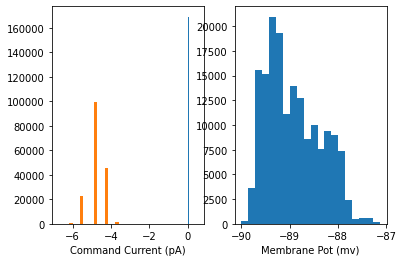

  0%|          | 1/344 [00:00<03:09,  1.81it/s]

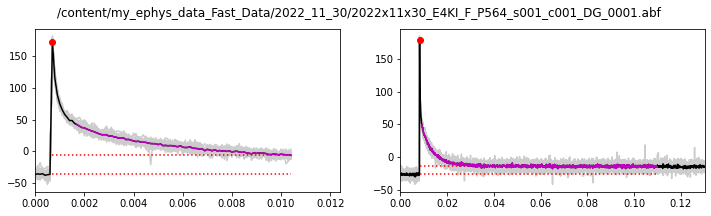

  1%|          | 2/344 [00:01<04:53,  1.17it/s]

<Figure size 432x288 with 0 Axes>

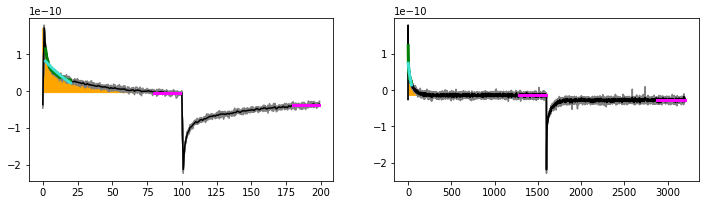

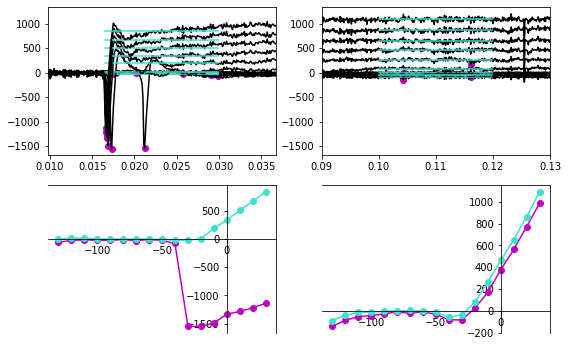

  1%|          | 3/344 [00:03<07:17,  1.28s/it]

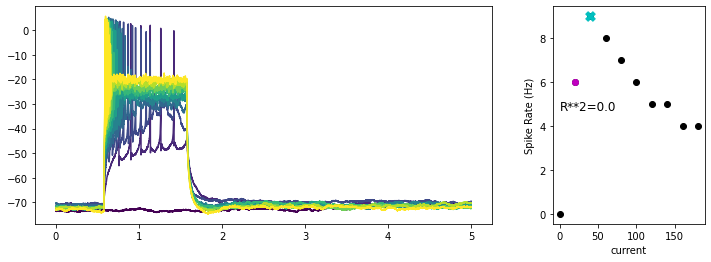

  1%|          | 4/344 [00:07<12:46,  2.25s/it]

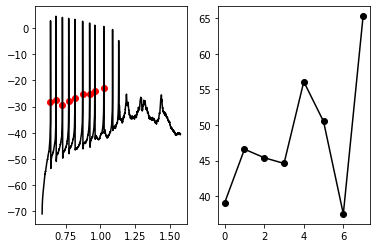

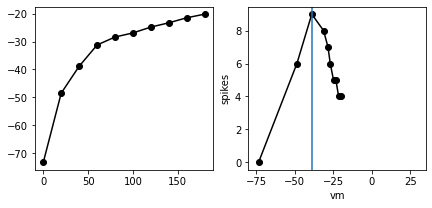

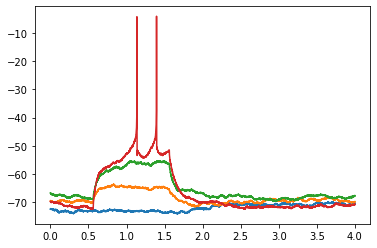

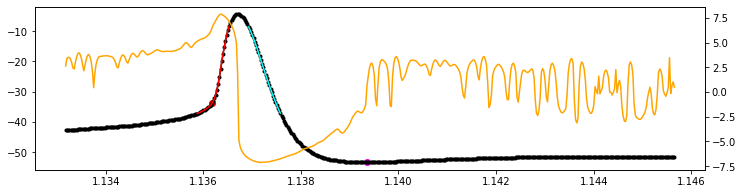

  1%|▏         | 5/344 [00:11<17:47,  3.15s/it]

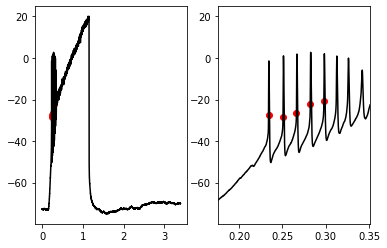

  2%|▏         | 6/344 [00:12<12:52,  2.28s/it]

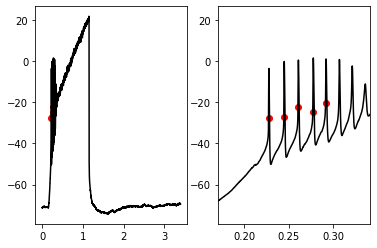

  2%|▏         | 8/344 [00:14<08:14,  1.47s/it]

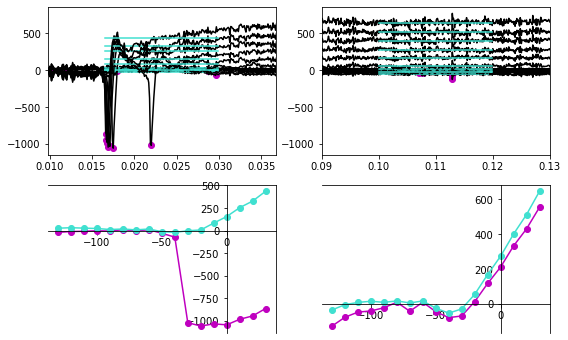

  3%|▎         | 9/344 [00:15<08:15,  1.48s/it]

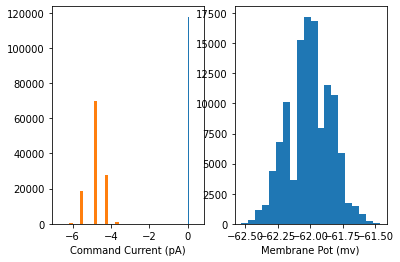

  3%|▎         | 10/344 [00:16<06:31,  1.17s/it]

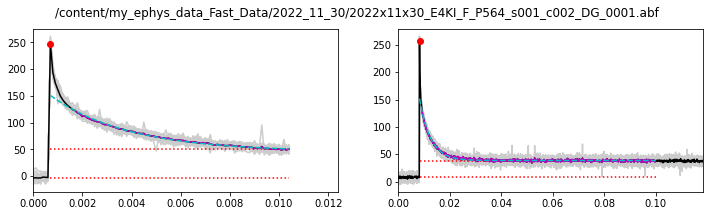

  3%|▎         | 11/344 [00:16<06:07,  1.10s/it]

<Figure size 432x288 with 0 Axes>

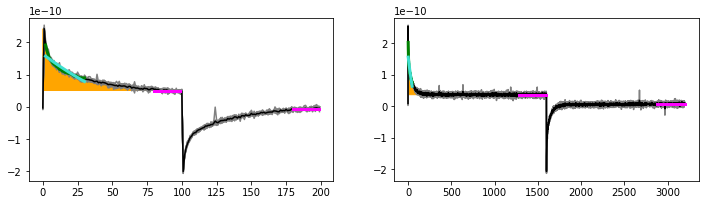

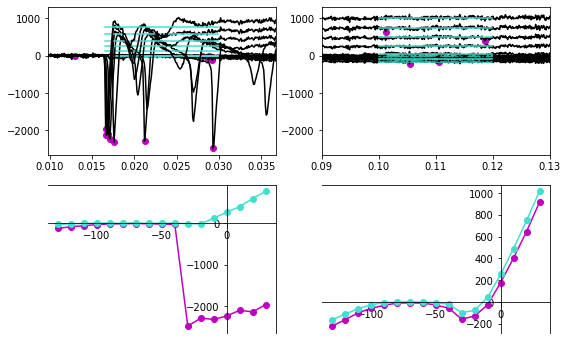

  3%|▎         | 12/344 [00:18<07:34,  1.37s/it]

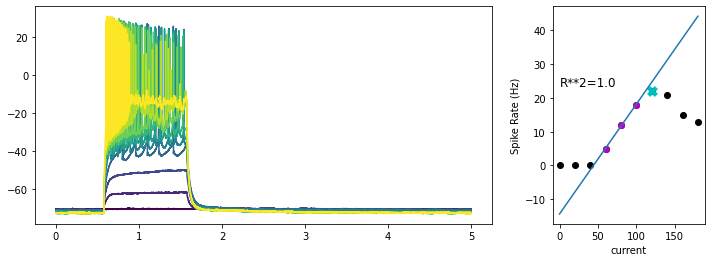

  4%|▍         | 13/344 [00:23<12:52,  2.33s/it]

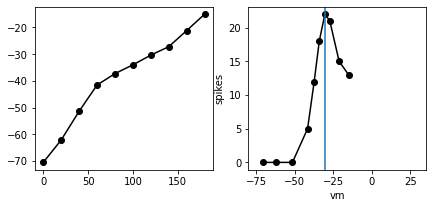

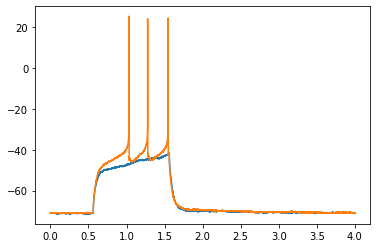

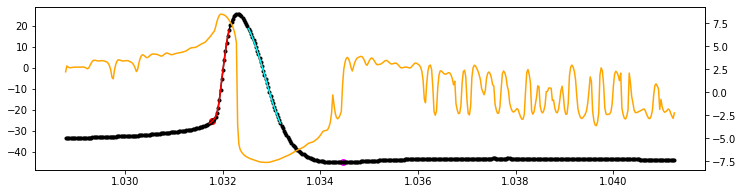

  4%|▍         | 14/344 [00:26<14:35,  2.65s/it]

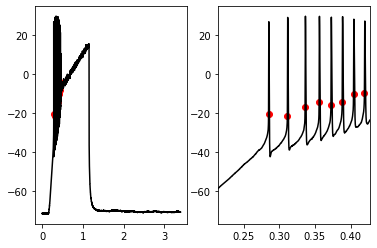

  5%|▍         | 16/344 [00:28<09:08,  1.67s/it]

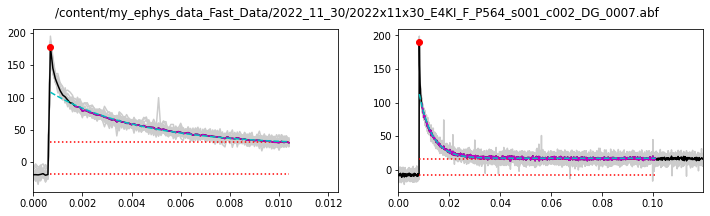

  5%|▍         | 17/344 [00:29<08:15,  1.52s/it]

<Figure size 432x288 with 0 Axes>

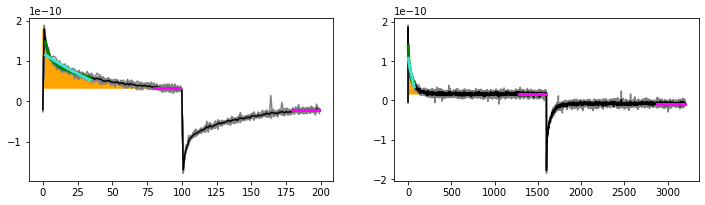

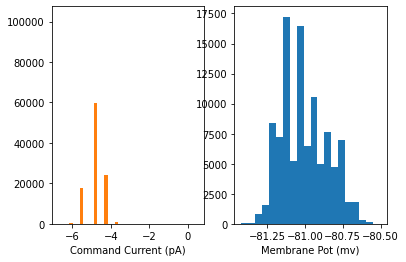

  5%|▌         | 18/344 [00:30<06:56,  1.28s/it]

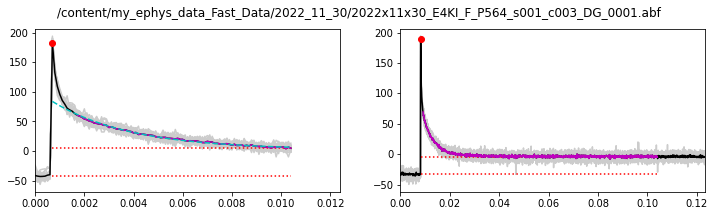

  6%|▌         | 19/344 [00:31<06:18,  1.16s/it]

<Figure size 432x288 with 0 Axes>

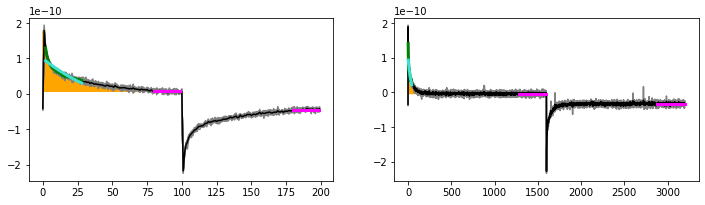

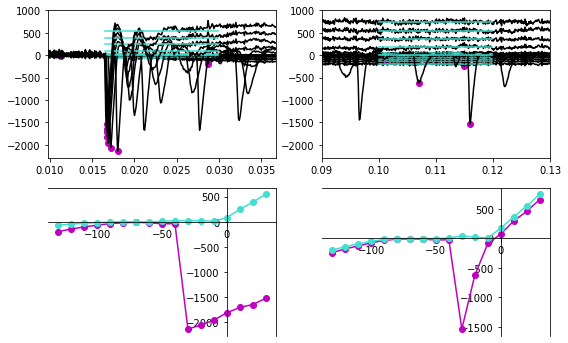

  6%|▌         | 20/344 [00:33<08:17,  1.54s/it]

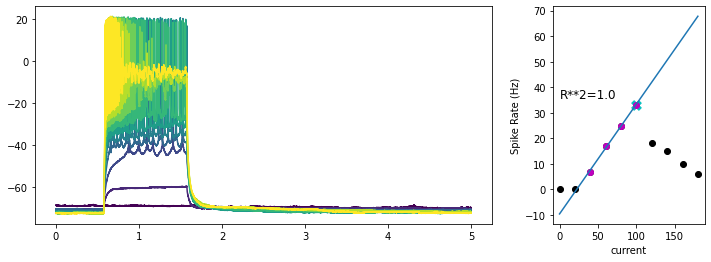

  6%|▌         | 21/344 [00:37<12:17,  2.28s/it]

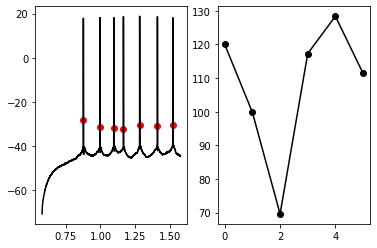

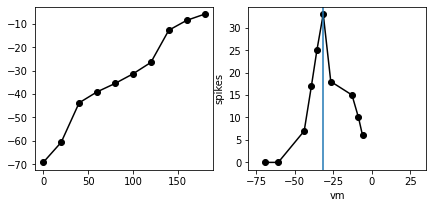

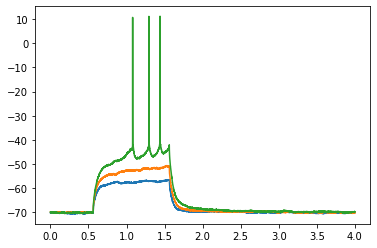

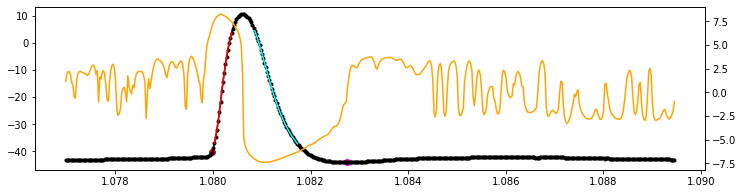

  6%|▋         | 22/344 [00:41<14:50,  2.76s/it]

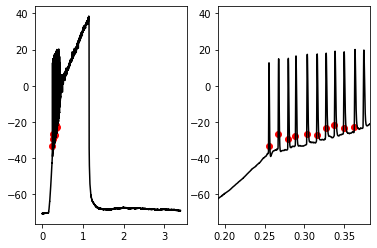

  7%|▋         | 24/344 [00:42<09:09,  1.72s/it]

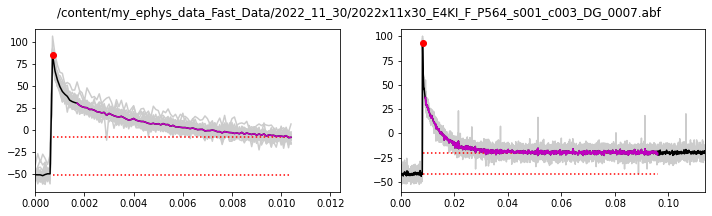

  7%|▋         | 25/344 [00:43<07:54,  1.49s/it]

<Figure size 432x288 with 0 Axes>

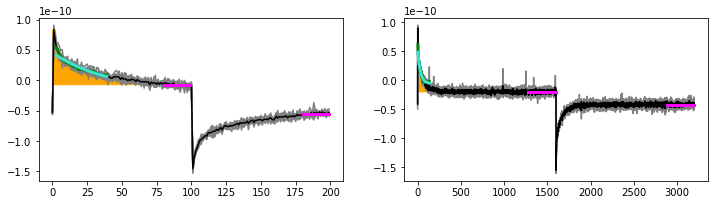

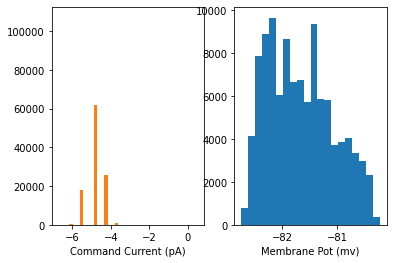

  8%|▊         | 26/344 [00:44<06:42,  1.27s/it]

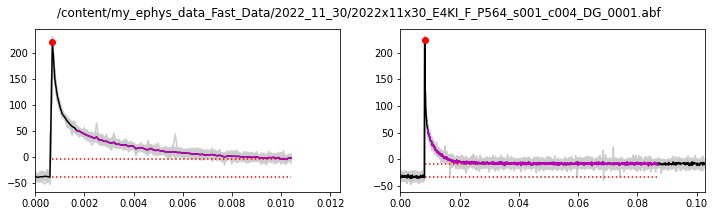

  8%|▊         | 27/344 [00:46<07:02,  1.33s/it]

<Figure size 432x288 with 0 Axes>

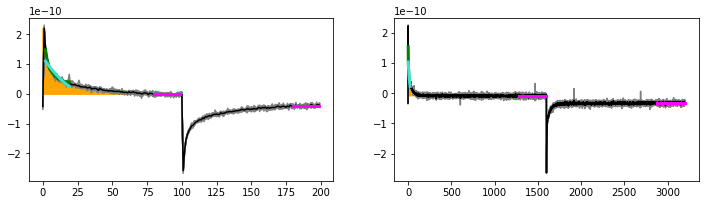

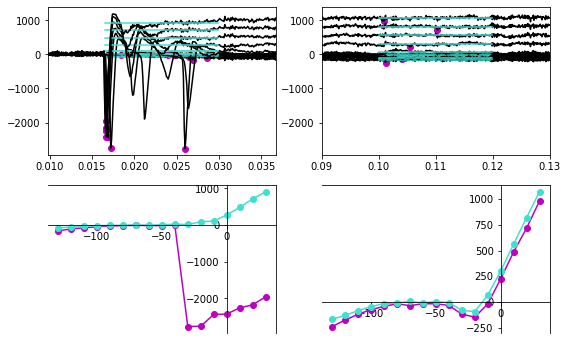

  8%|▊         | 28/344 [00:48<08:31,  1.62s/it]

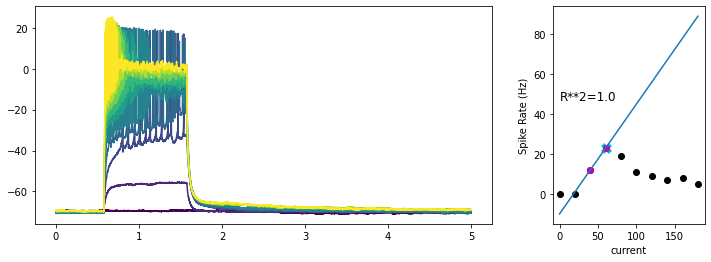

  8%|▊         | 29/344 [00:51<11:02,  2.10s/it]

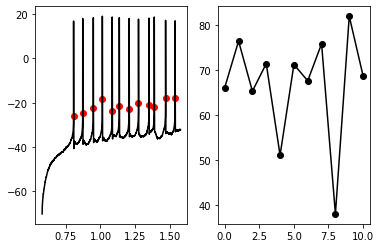

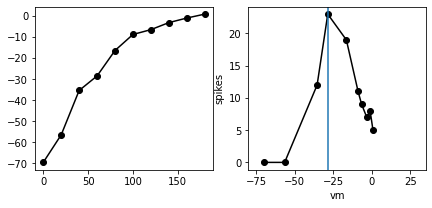

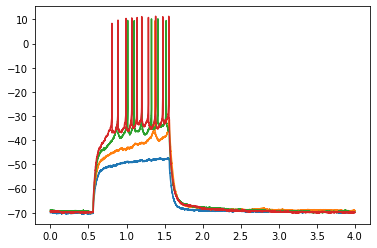

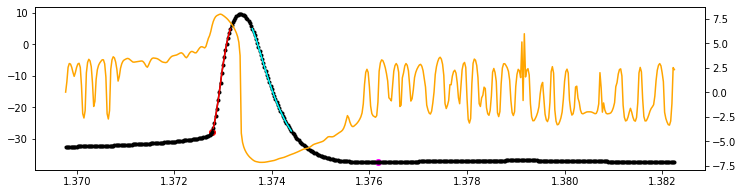

  9%|▉         | 31/344 [00:55<10:21,  1.98s/it]

no spikes found


  9%|▉         | 32/344 [00:56<08:29,  1.63s/it]

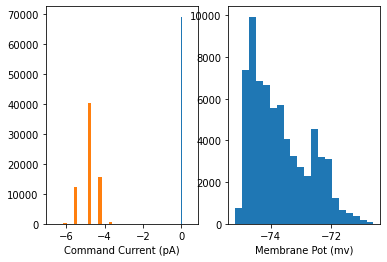

 10%|▉         | 33/344 [00:57<06:40,  1.29s/it]

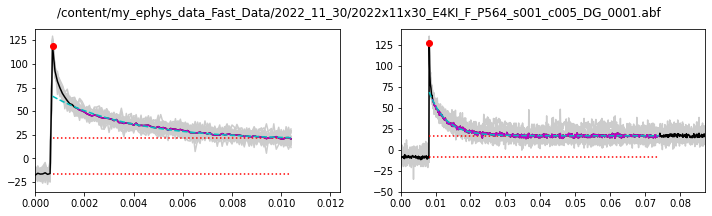

 10%|▉         | 34/344 [00:58<06:39,  1.29s/it]

<Figure size 432x288 with 0 Axes>

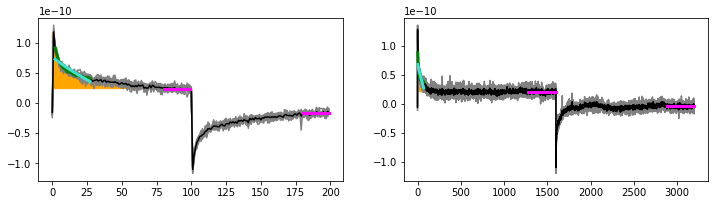

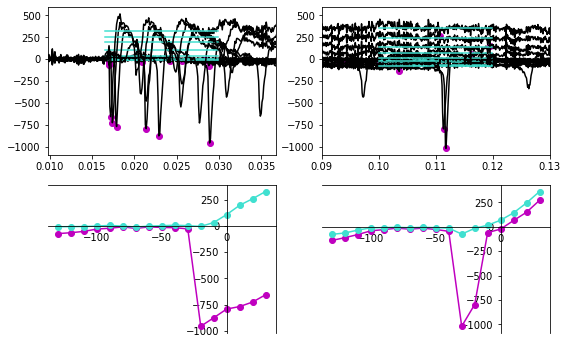

 10%|█         | 35/344 [01:01<08:28,  1.65s/it]

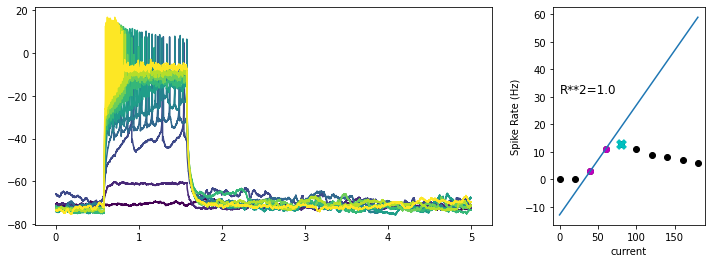

 10%|█         | 36/344 [01:04<11:18,  2.20s/it]

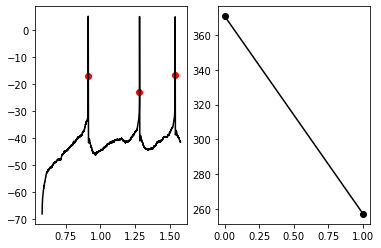

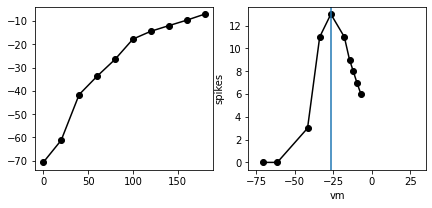

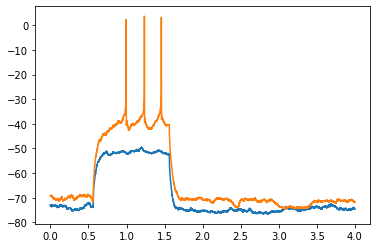

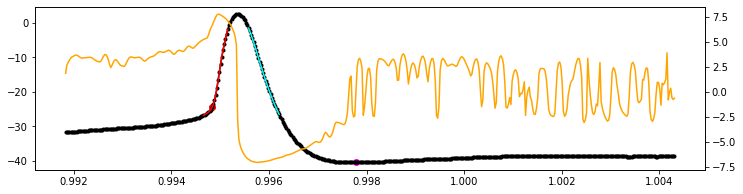

 11%|█         | 37/344 [01:09<14:50,  2.90s/it]

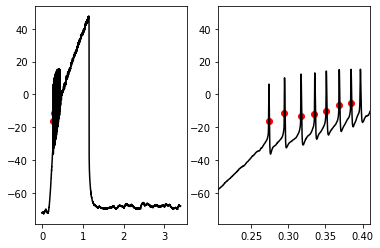

 11%|█▏        | 39/344 [01:10<09:06,  1.79s/it]

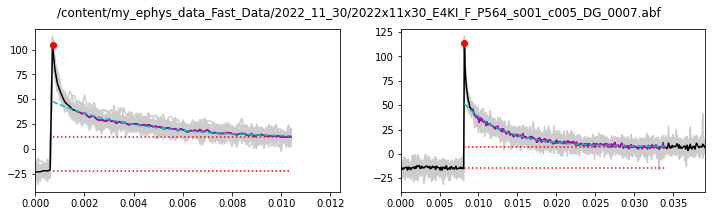

 12%|█▏        | 40/344 [01:12<08:49,  1.74s/it]

<Figure size 432x288 with 0 Axes>

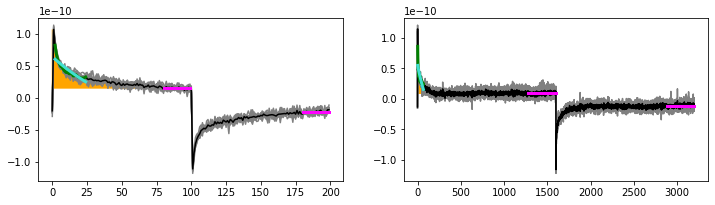

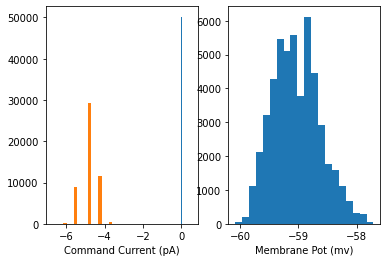

 12%|█▏        | 41/344 [01:13<07:55,  1.57s/it]

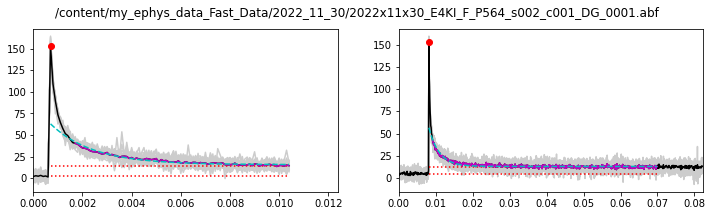

 12%|█▏        | 42/344 [01:14<07:13,  1.44s/it]

<Figure size 432x288 with 0 Axes>

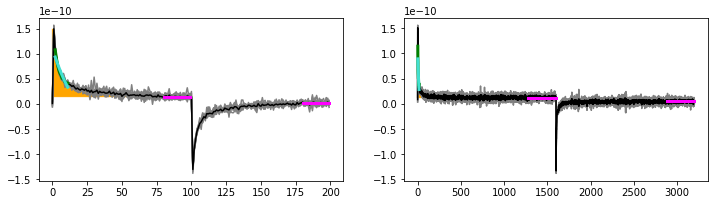

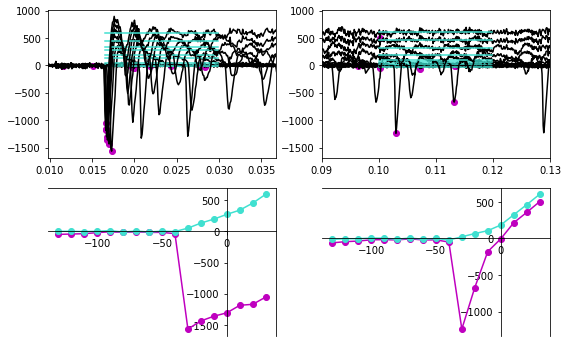

 12%|█▎        | 43/344 [01:16<07:51,  1.57s/it]

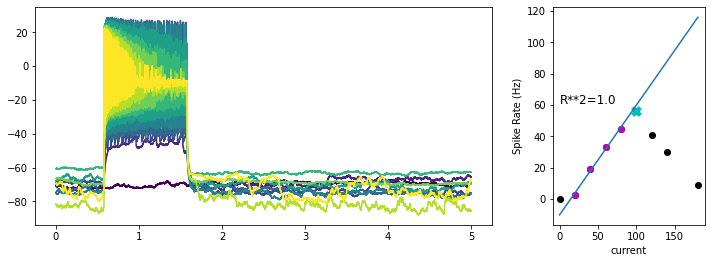

 13%|█▎        | 44/344 [01:19<10:45,  2.15s/it]


 error on:  my_ephys_data_Fast_Data/2022_11_30/2022x11x30_E4KI_F_P564_s002_c001_DG_0003.abf
analysis failed


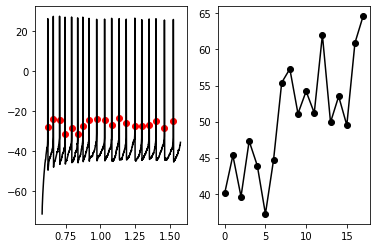

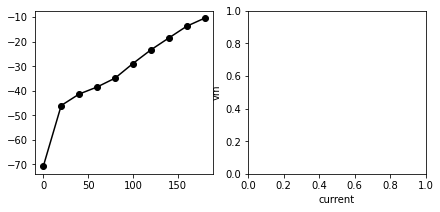

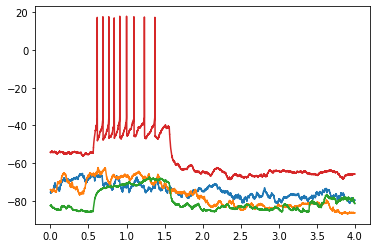

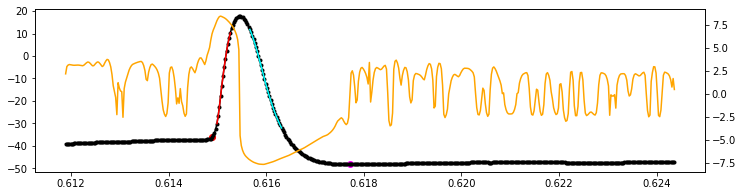

 13%|█▎        | 45/344 [01:24<13:58,  2.81s/it]

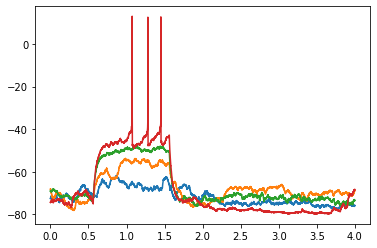

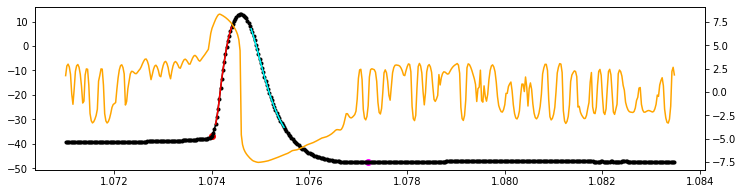

 13%|█▎        | 46/344 [01:28<16:49,  3.39s/it]

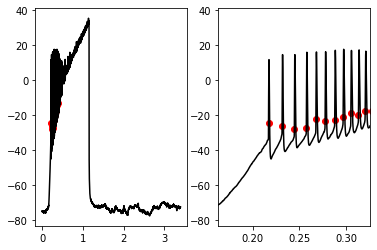

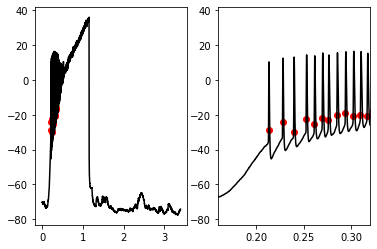

 14%|█▍        | 48/344 [01:30<10:44,  2.18s/it]

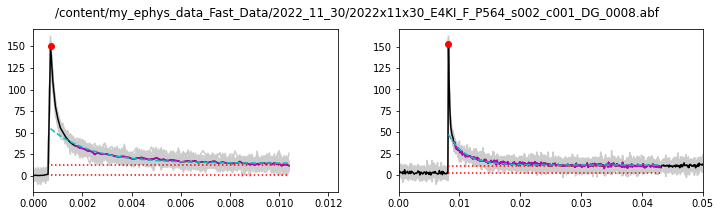

 14%|█▍        | 49/344 [01:32<09:07,  1.86s/it]

<Figure size 432x288 with 0 Axes>

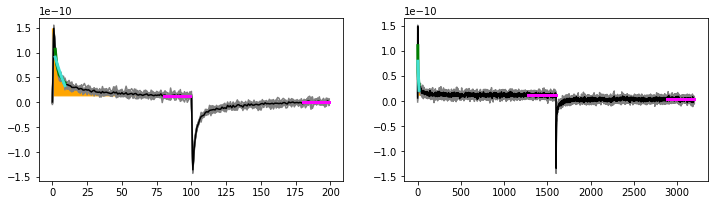

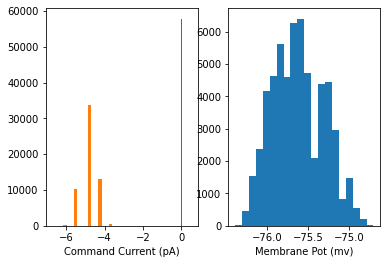

 15%|█▍        | 50/344 [01:32<07:32,  1.54s/it]

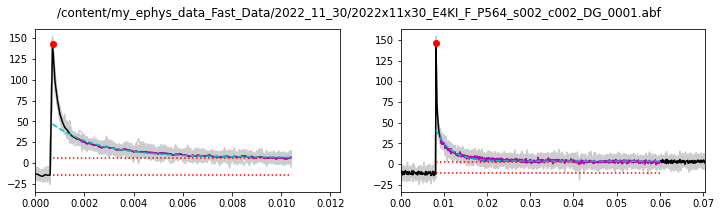

 15%|█▍        | 51/344 [01:33<06:40,  1.37s/it]

<Figure size 432x288 with 0 Axes>

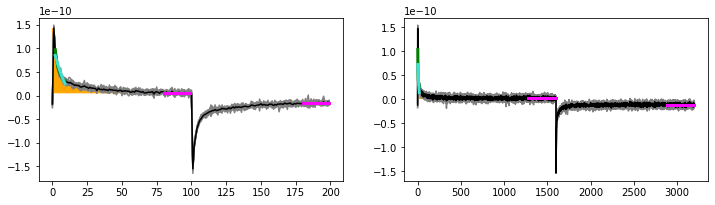

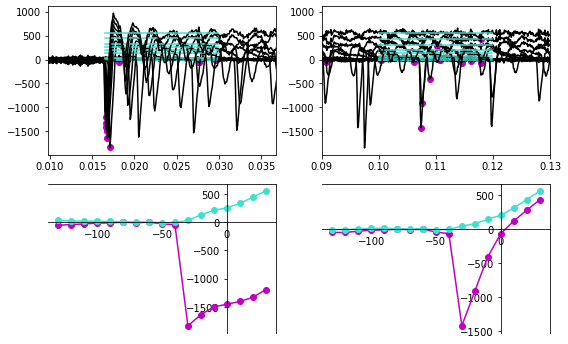

 15%|█▌        | 52/344 [01:35<07:39,  1.57s/it]

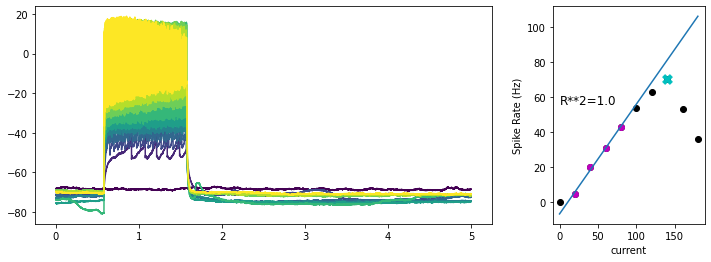

 15%|█▌        | 53/344 [01:40<12:04,  2.49s/it]

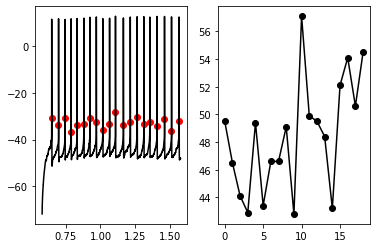

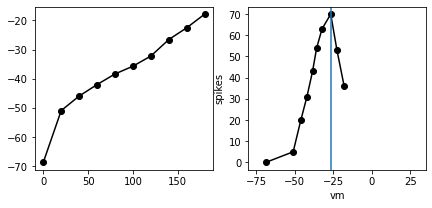

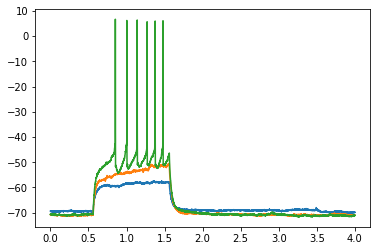

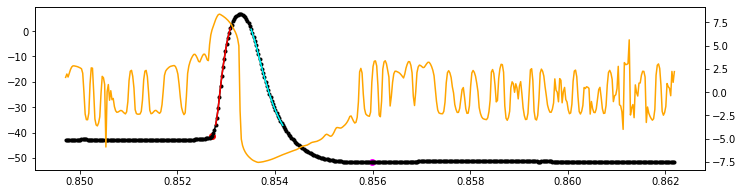

 16%|█▌        | 54/344 [01:44<14:03,  2.91s/it]

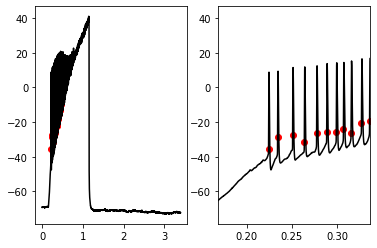

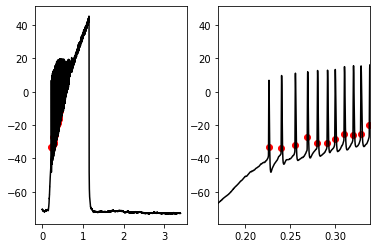

 16%|█▋        | 56/344 [01:46<09:14,  1.93s/it]

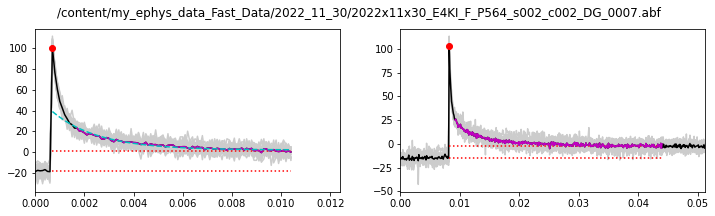

 17%|█▋        | 57/344 [01:47<08:06,  1.69s/it]

<Figure size 432x288 with 0 Axes>

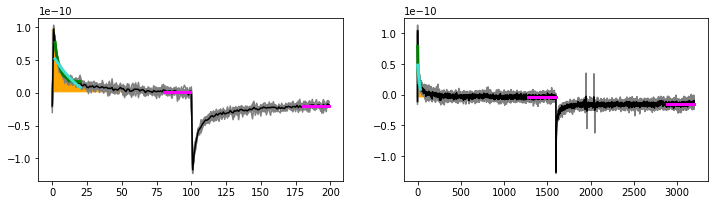

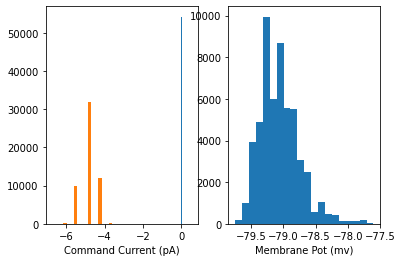

 17%|█▋        | 58/344 [01:48<06:44,  1.41s/it]

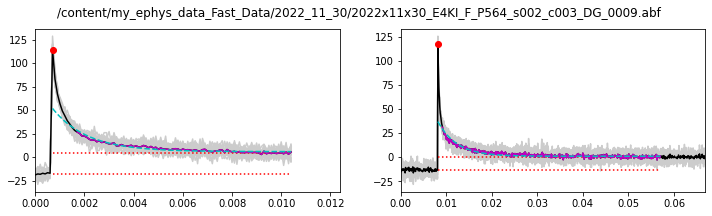

 17%|█▋        | 59/344 [01:49<06:03,  1.28s/it]

<Figure size 432x288 with 0 Axes>

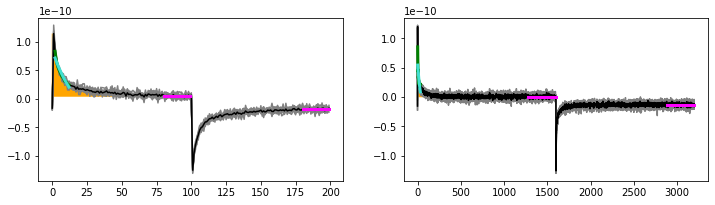

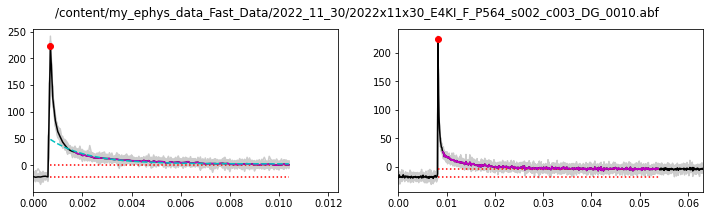

 17%|█▋        | 60/344 [01:50<06:26,  1.36s/it]

<Figure size 432x288 with 0 Axes>

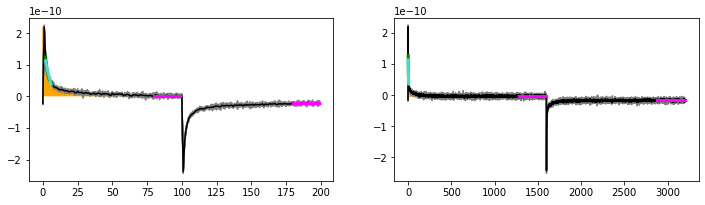

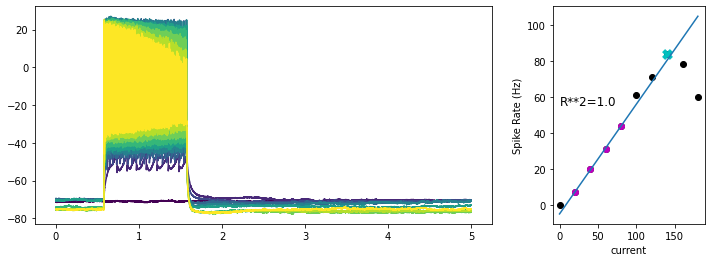

 18%|█▊        | 61/344 [01:55<10:39,  2.26s/it]

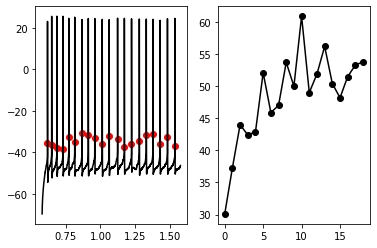

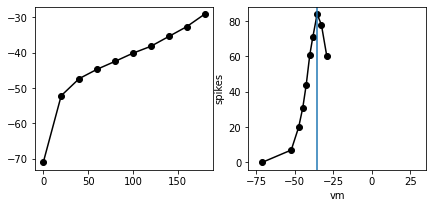

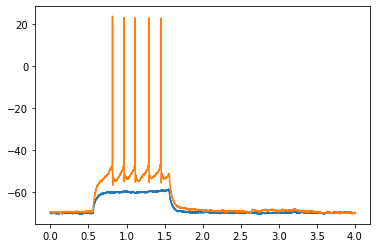

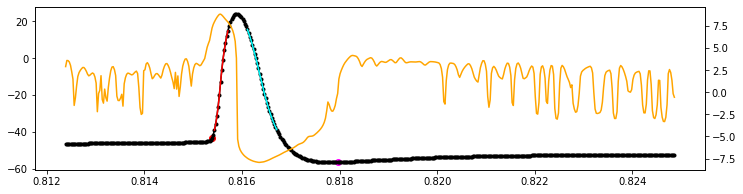

 18%|█▊        | 62/344 [01:58<12:27,  2.65s/it]

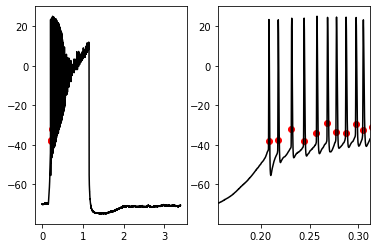

 19%|█▊        | 64/344 [02:00<07:45,  1.66s/it]

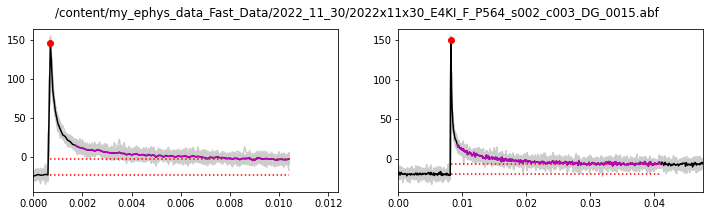

 19%|█▉        | 65/344 [02:01<06:33,  1.41s/it]

<Figure size 432x288 with 0 Axes>

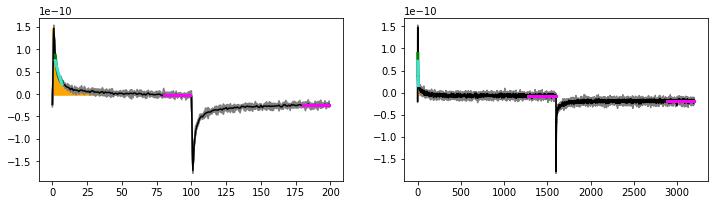

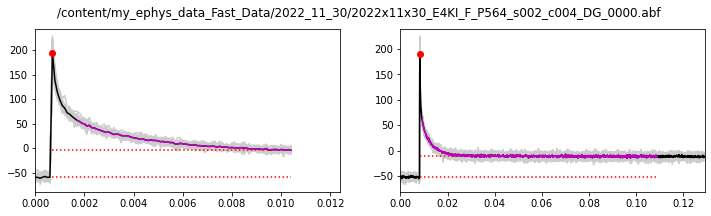

 19%|█▉        | 66/344 [02:02<06:17,  1.36s/it]

<Figure size 432x288 with 0 Axes>

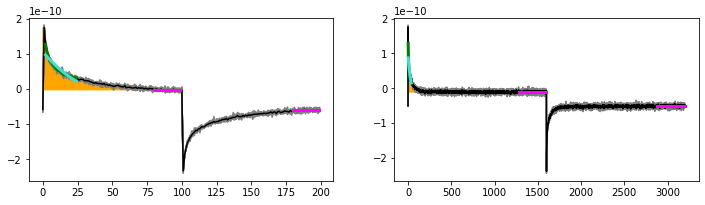

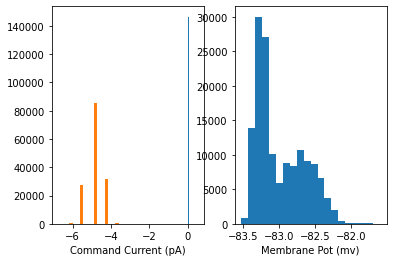

 19%|█▉        | 67/344 [02:03<05:41,  1.23s/it]

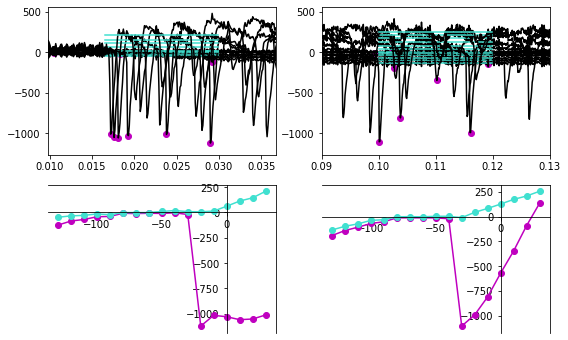

 20%|█▉        | 68/344 [02:05<06:50,  1.49s/it]

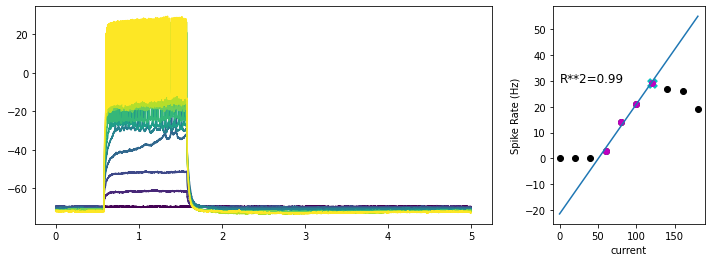

 20%|██        | 69/344 [02:08<09:13,  2.01s/it]

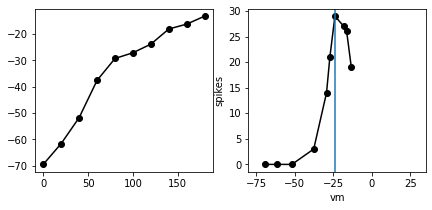

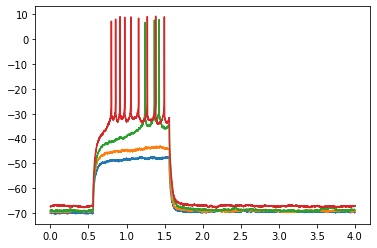

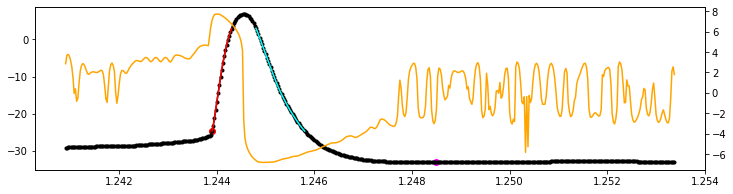

 20%|██        | 70/344 [02:12<11:46,  2.58s/it]

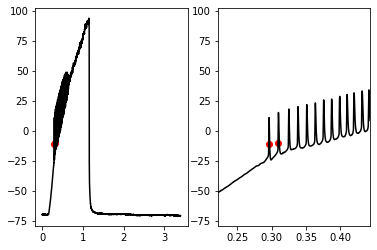

 21%|██        | 72/344 [02:13<07:28,  1.65s/it]

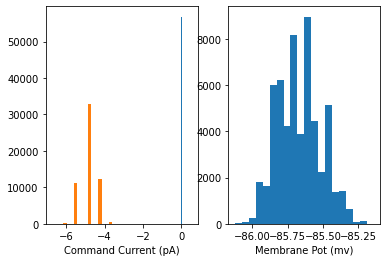

 21%|██        | 73/344 [02:14<05:52,  1.30s/it]

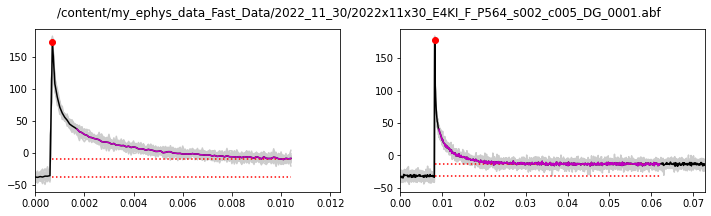

 22%|██▏       | 74/344 [02:15<05:21,  1.19s/it]

<Figure size 432x288 with 0 Axes>

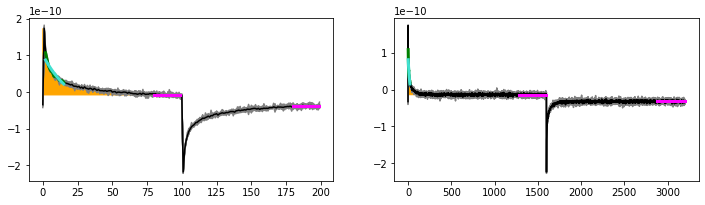

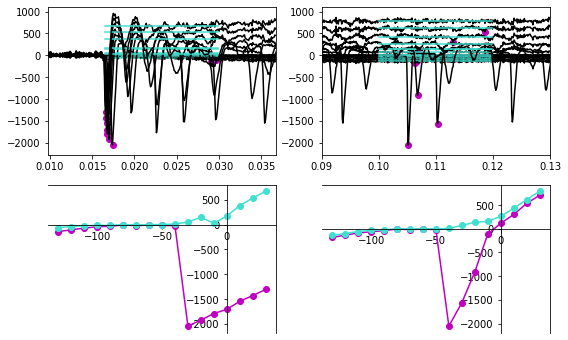

 22%|██▏       | 75/344 [02:17<07:17,  1.63s/it]

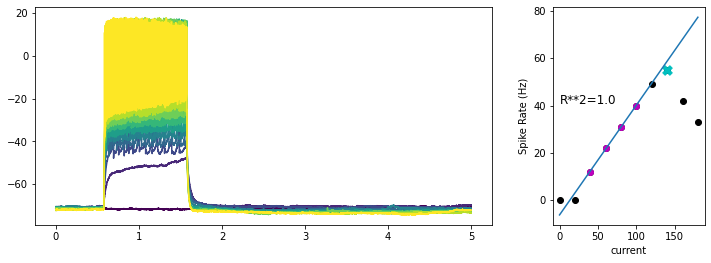

 22%|██▏       | 76/344 [02:21<09:36,  2.15s/it]

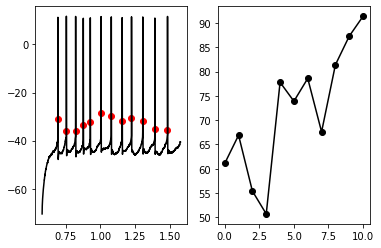

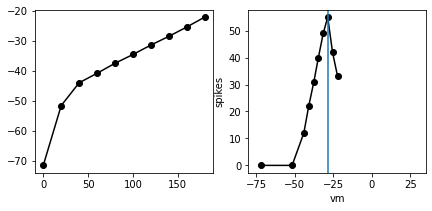

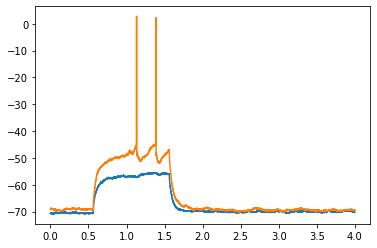

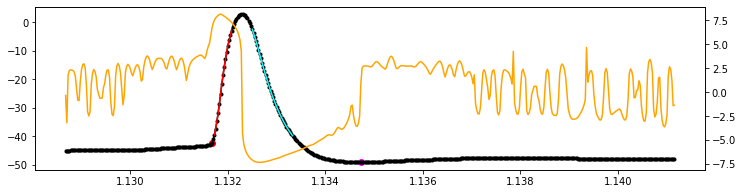

 22%|██▏       | 77/344 [02:24<11:29,  2.58s/it]

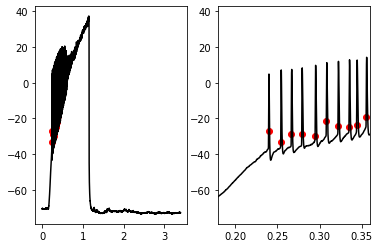

 23%|██▎       | 79/344 [02:26<07:14,  1.64s/it]

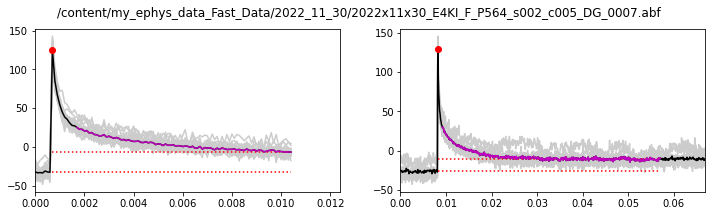

 23%|██▎       | 80/344 [02:27<06:31,  1.48s/it]

<Figure size 432x288 with 0 Axes>

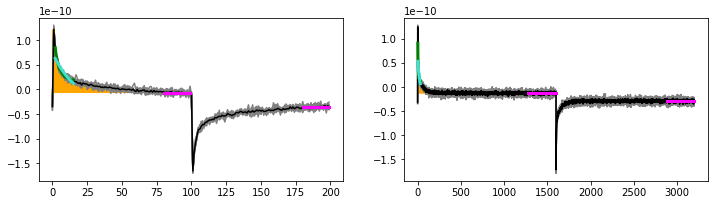

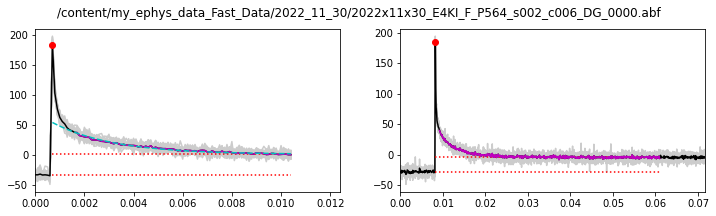

 24%|██▎       | 81/344 [02:28<06:10,  1.41s/it]

<Figure size 432x288 with 0 Axes>

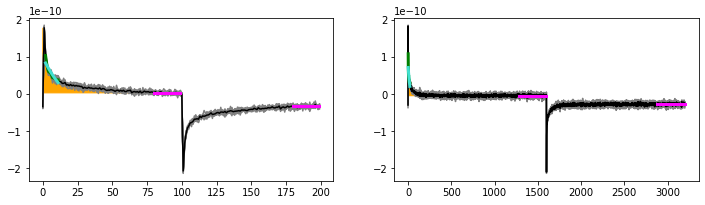

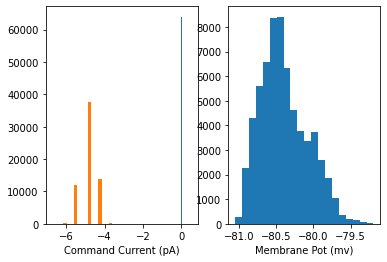

 24%|██▍       | 82/344 [02:29<05:49,  1.33s/it]

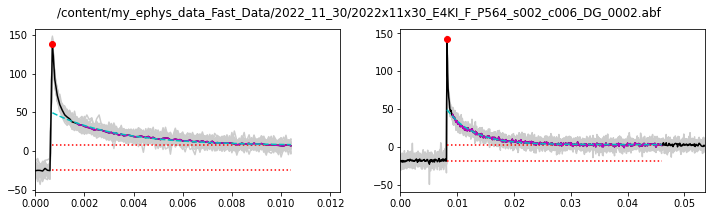

 24%|██▍       | 83/344 [02:31<05:50,  1.34s/it]

<Figure size 432x288 with 0 Axes>

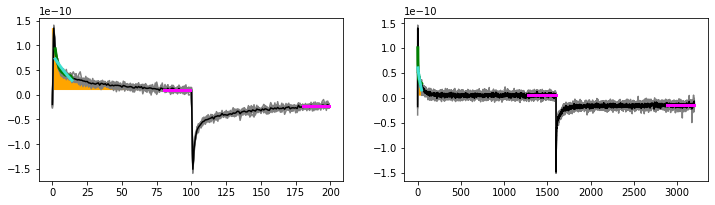

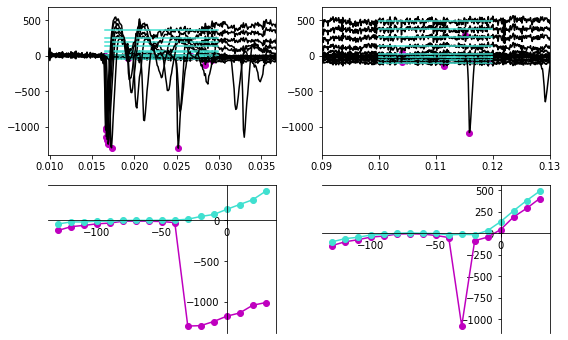

 24%|██▍       | 84/344 [02:34<07:59,  1.85s/it]

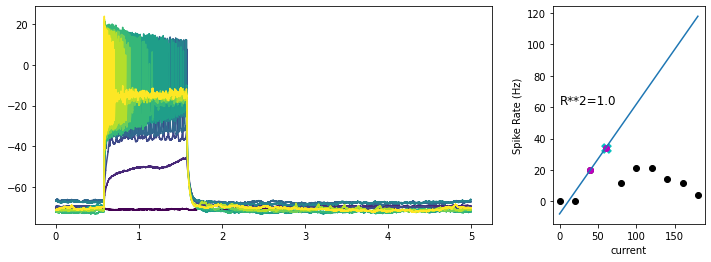

 25%|██▍       | 85/344 [02:37<09:42,  2.25s/it]

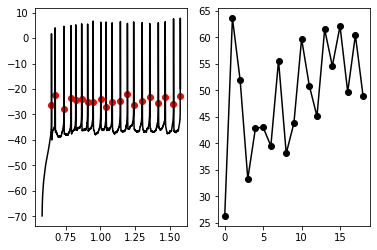

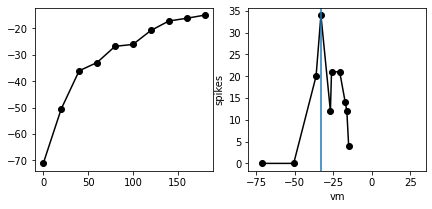

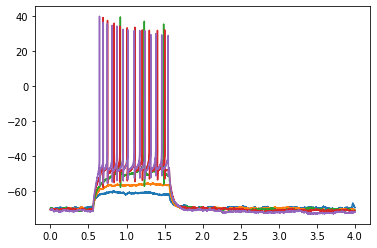

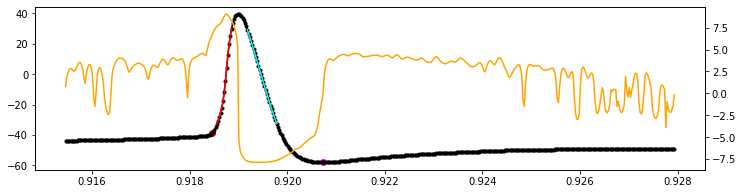

 25%|██▌       | 86/344 [02:41<12:19,  2.87s/it]

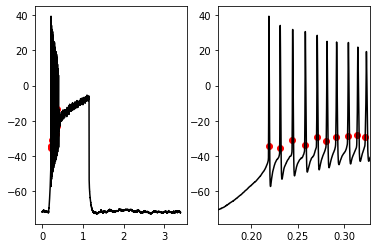

 26%|██▌       | 88/344 [02:43<07:38,  1.79s/it]

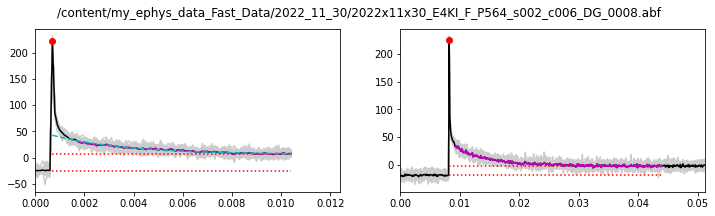

 26%|██▌       | 89/344 [02:44<07:28,  1.76s/it]

<Figure size 432x288 with 0 Axes>

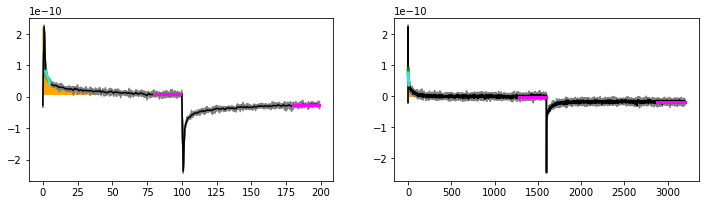

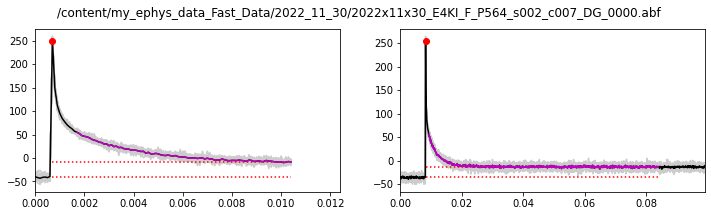

 26%|██▌       | 90/344 [02:46<07:26,  1.76s/it]

<Figure size 432x288 with 0 Axes>

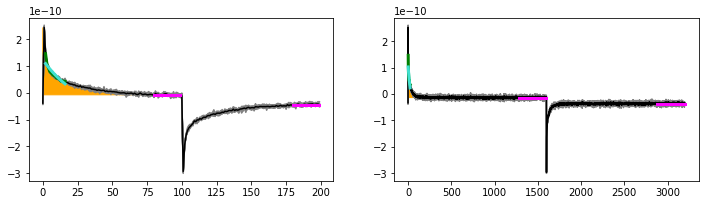

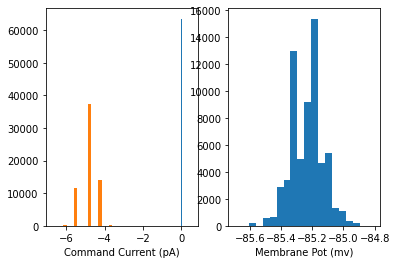

 26%|██▋       | 91/344 [02:47<06:17,  1.49s/it]

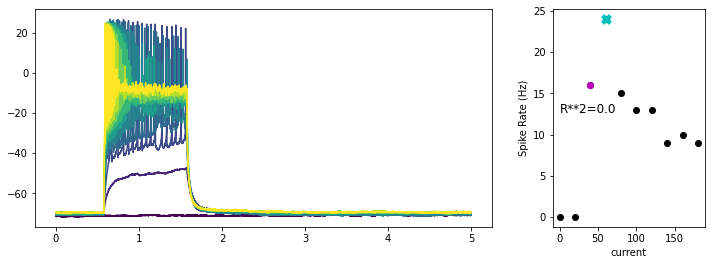

 27%|██▋       | 92/344 [02:50<08:37,  2.05s/it]

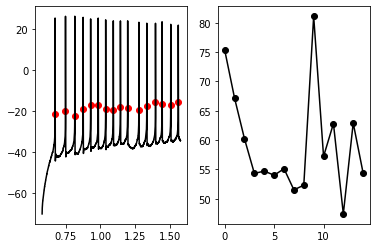

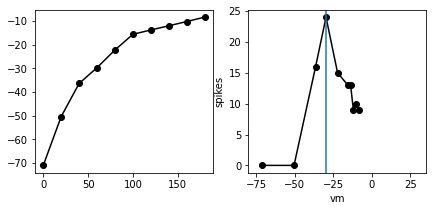

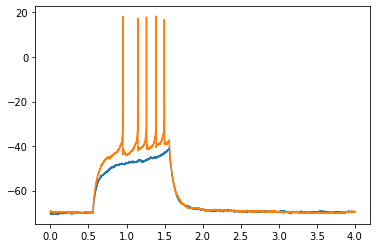

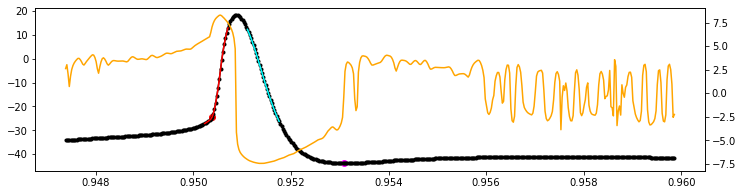

 27%|██▋       | 93/344 [02:54<10:48,  2.58s/it]

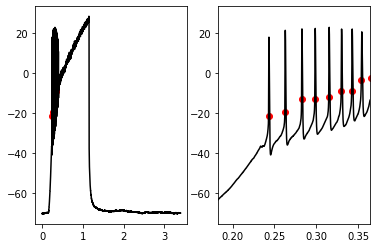

 28%|██▊       | 95/344 [02:56<07:09,  1.72s/it]

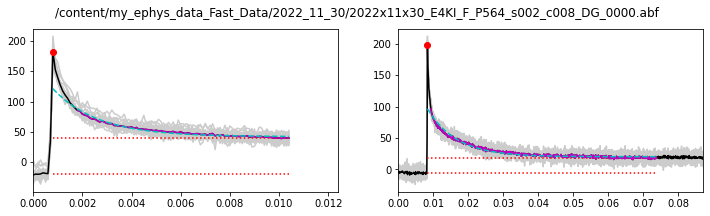

 28%|██▊       | 96/344 [02:57<06:46,  1.64s/it]

<Figure size 432x288 with 0 Axes>

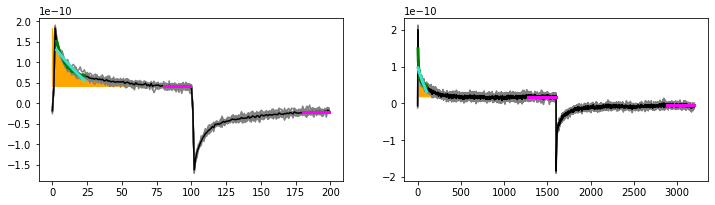

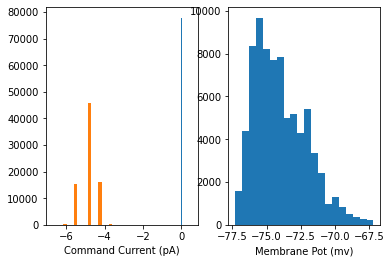

 28%|██▊       | 97/344 [02:59<06:18,  1.53s/it]

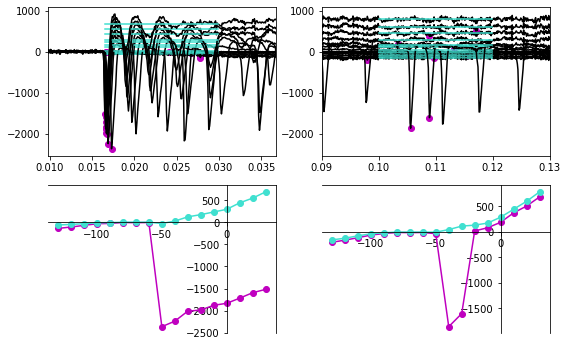

 28%|██▊       | 98/344 [03:01<06:41,  1.63s/it]

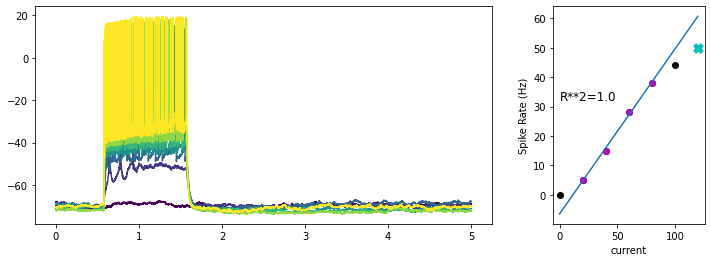

 29%|██▉       | 99/344 [03:03<08:02,  1.97s/it]

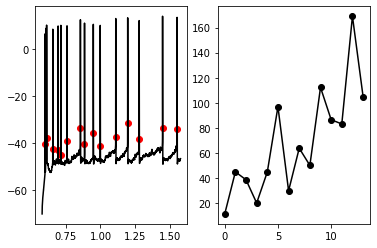

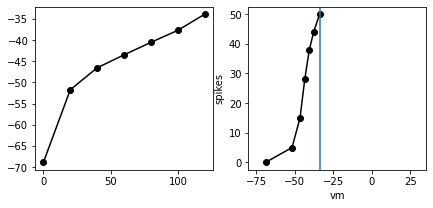

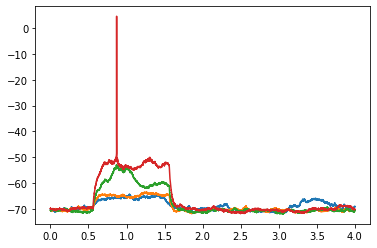

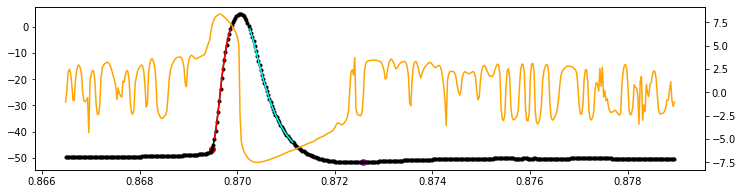

 29%|██▉       | 100/344 [03:07<10:37,  2.61s/it]

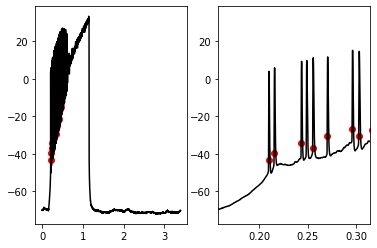

 30%|██▉       | 102/344 [03:09<06:46,  1.68s/it]

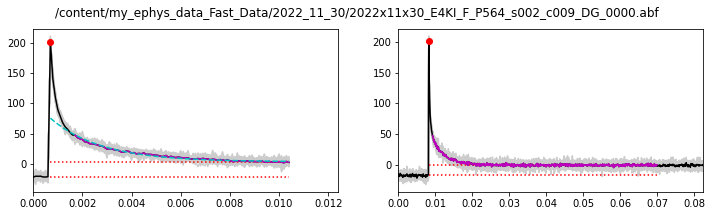

 30%|██▉       | 103/344 [03:10<06:11,  1.54s/it]

<Figure size 432x288 with 0 Axes>

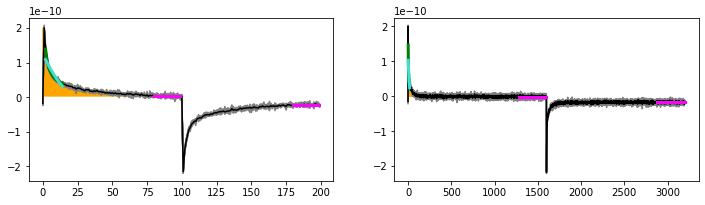

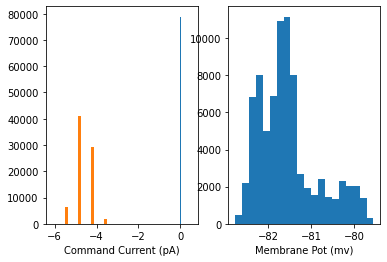

 30%|███       | 104/344 [03:11<05:44,  1.44s/it]

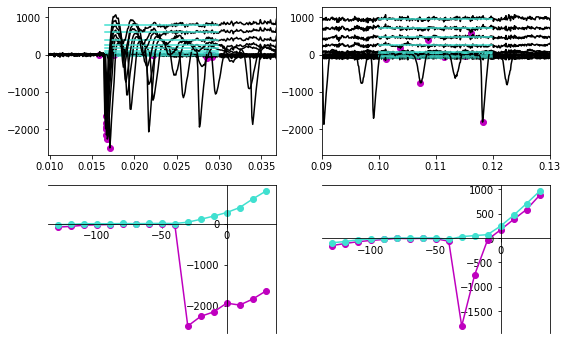

 31%|███       | 105/344 [03:14<06:32,  1.64s/it]

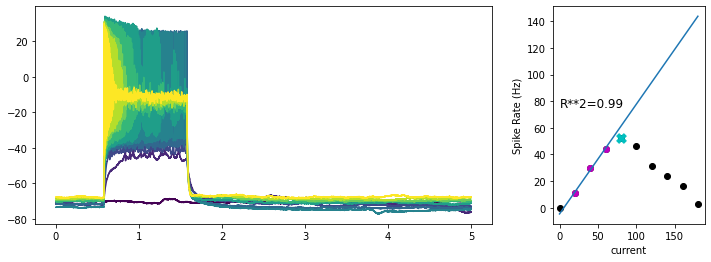

 31%|███       | 106/344 [03:17<08:33,  2.16s/it]

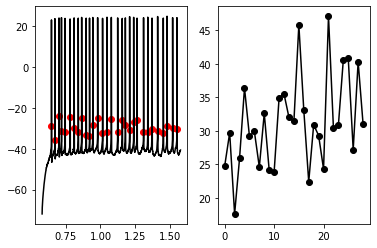

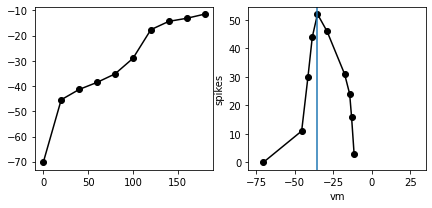

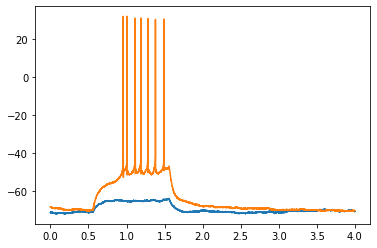

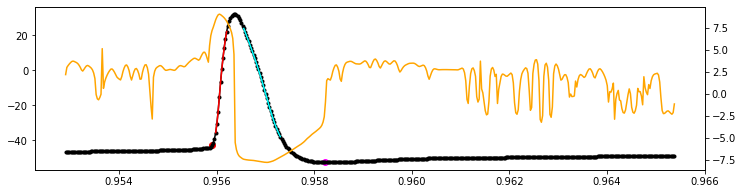

 31%|███       | 107/344 [03:21<10:18,  2.61s/it]

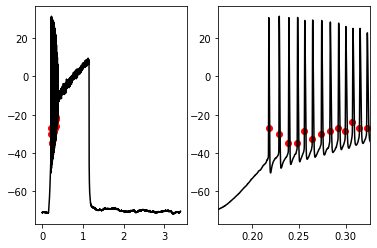

 32%|███▏      | 109/344 [03:22<06:32,  1.67s/it]

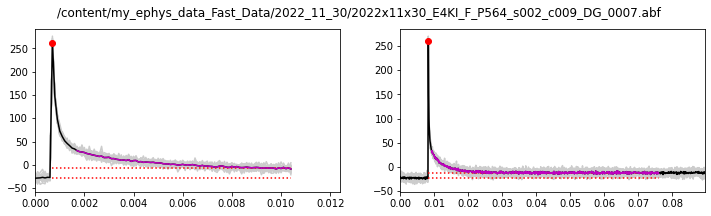

 32%|███▏      | 110/344 [03:23<06:12,  1.59s/it]

<Figure size 432x288 with 0 Axes>

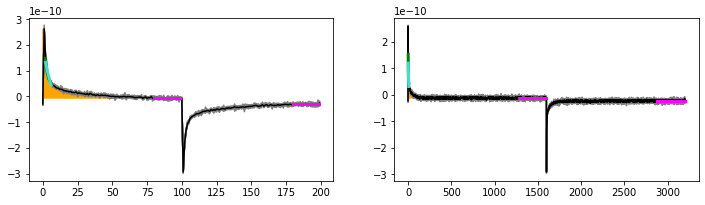

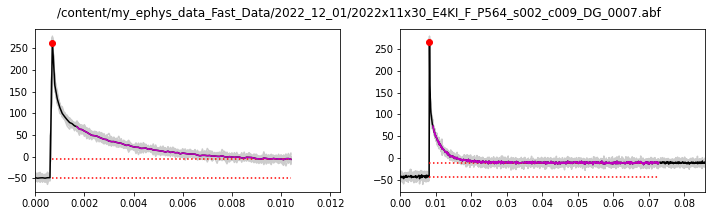

 32%|███▏      | 111/344 [03:25<06:30,  1.68s/it]

<Figure size 432x288 with 0 Axes>

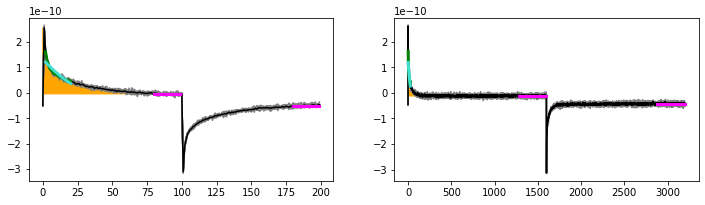

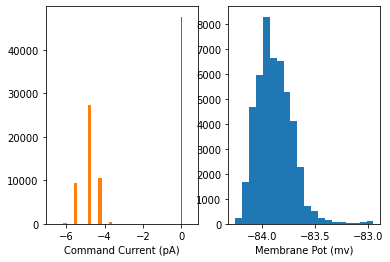

 33%|███▎      | 112/344 [03:26<05:43,  1.48s/it]

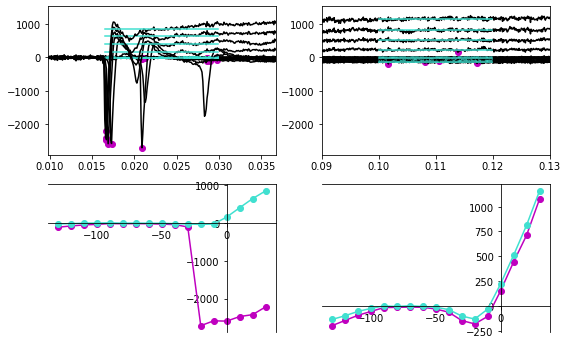

 33%|███▎      | 113/344 [03:28<05:45,  1.50s/it]

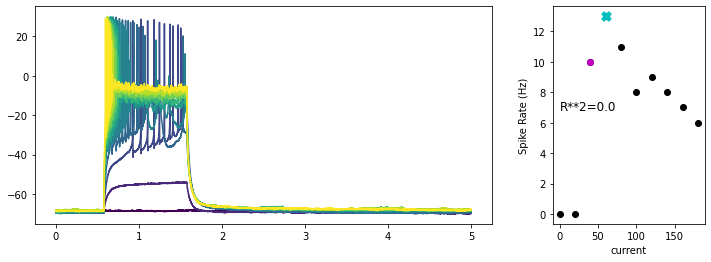

 33%|███▎      | 114/344 [03:31<08:03,  2.10s/it]

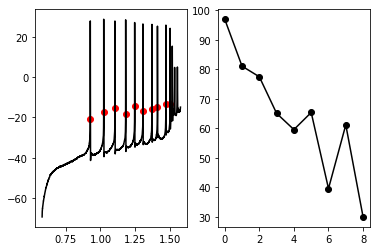

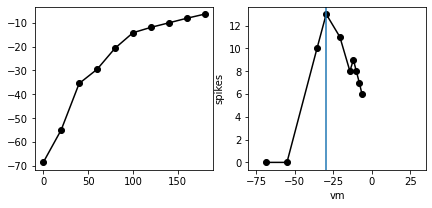

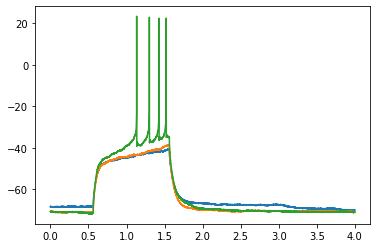

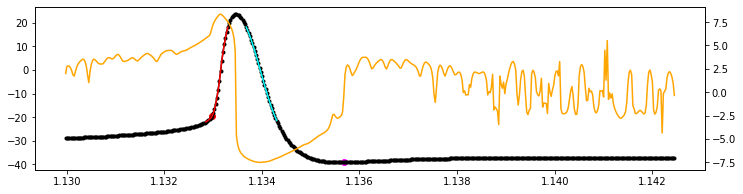

 33%|███▎      | 115/344 [03:35<10:07,  2.65s/it]

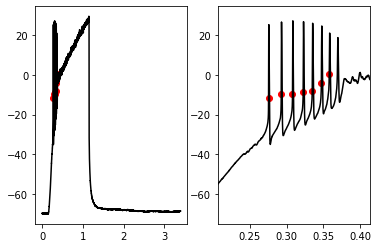

 34%|███▍      | 117/344 [03:37<07:05,  1.87s/it]

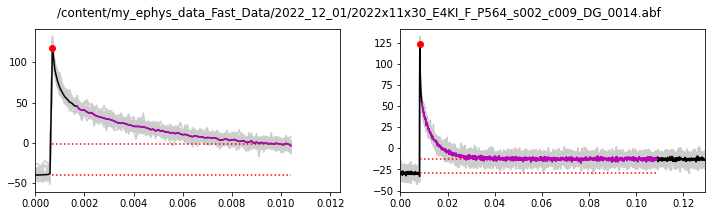

 34%|███▍      | 118/344 [03:39<06:39,  1.77s/it]

<Figure size 432x288 with 0 Axes>

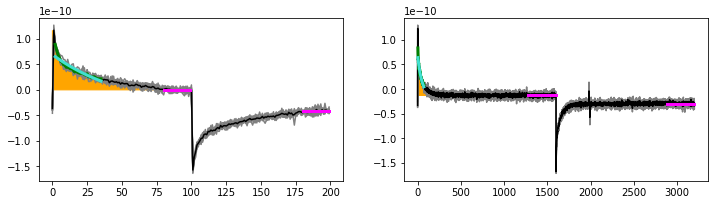

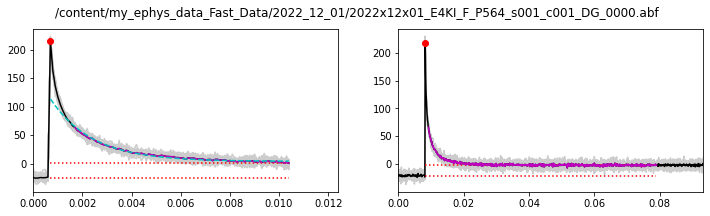

 35%|███▍      | 119/344 [03:41<06:22,  1.70s/it]

<Figure size 432x288 with 0 Axes>

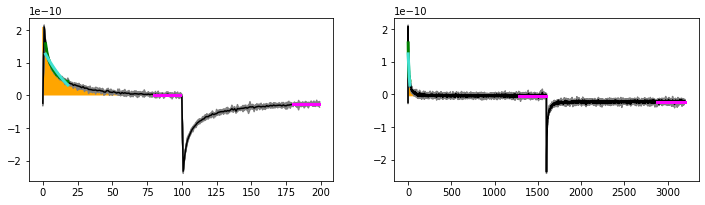

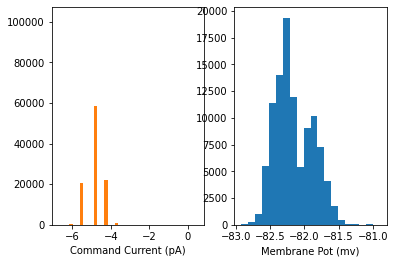

 35%|███▍      | 120/344 [03:41<05:22,  1.44s/it]

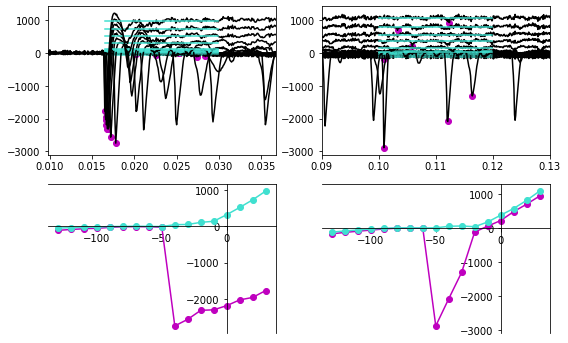

 35%|███▌      | 121/344 [03:43<05:28,  1.47s/it]

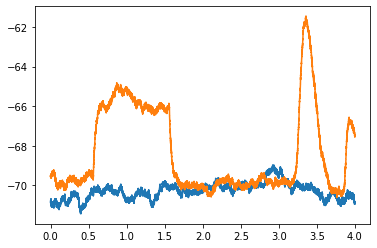

 35%|███▌      | 122/344 [03:44<04:39,  1.26s/it]

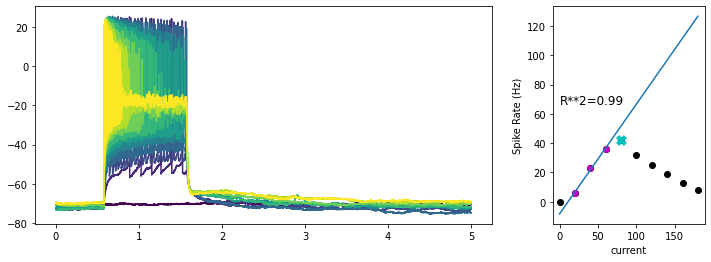

 36%|███▌      | 123/344 [03:47<06:51,  1.86s/it]

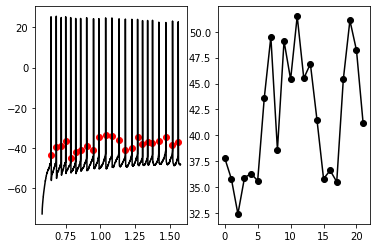

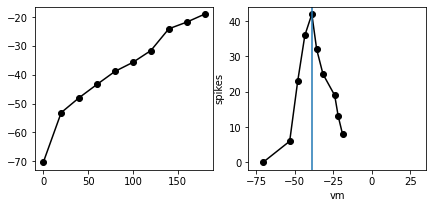

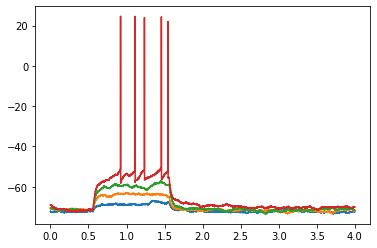

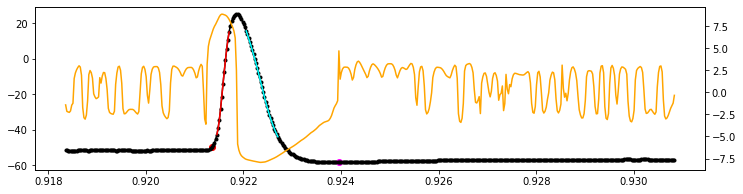

 36%|███▌      | 124/344 [03:53<11:01,  3.01s/it]

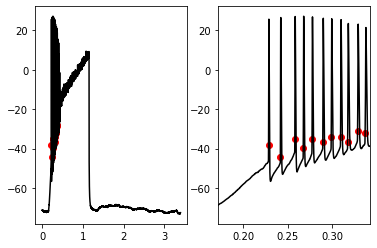

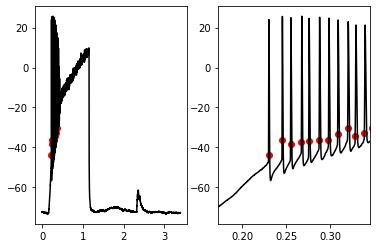

 37%|███▋      | 126/344 [03:55<07:12,  1.98s/it]

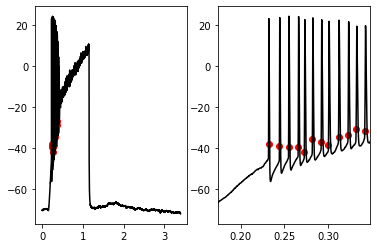

 37%|███▋      | 127/344 [03:55<05:43,  1.58s/it]

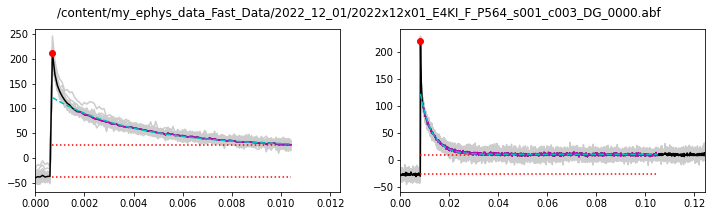

 37%|███▋      | 128/344 [03:56<05:04,  1.41s/it]

<Figure size 432x288 with 0 Axes>

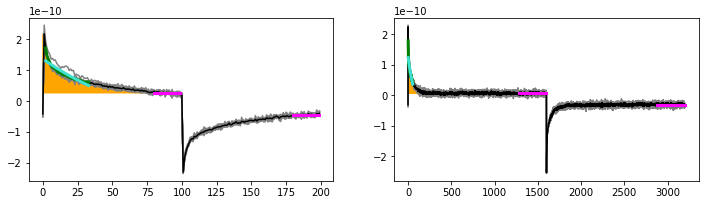

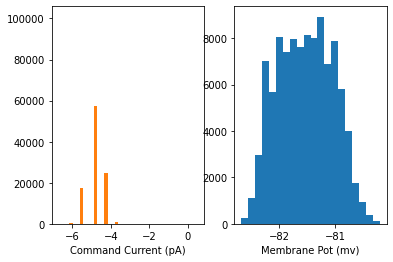

 38%|███▊      | 129/344 [03:57<04:38,  1.29s/it]

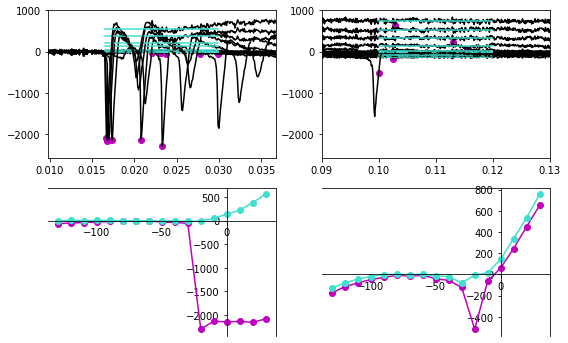

 38%|███▊      | 130/344 [03:59<05:00,  1.40s/it]

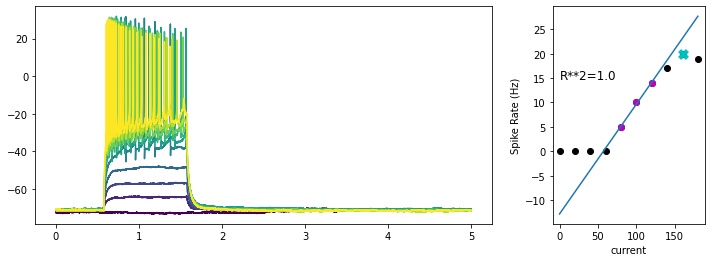

 38%|███▊      | 131/344 [04:03<07:17,  2.05s/it]

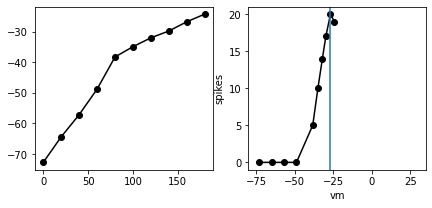

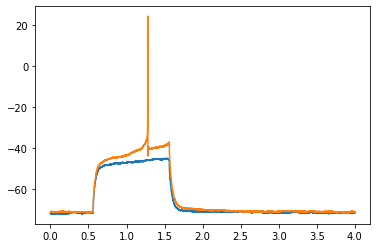

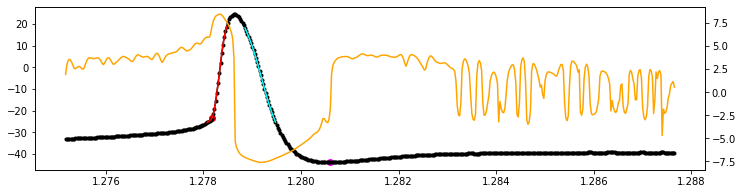

 38%|███▊      | 132/344 [04:07<09:57,  2.82s/it]

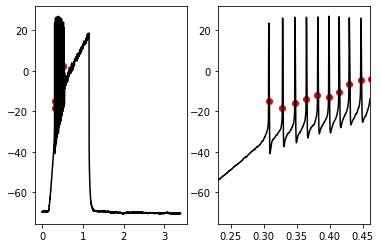

 39%|███▉      | 134/344 [04:09<06:12,  1.77s/it]

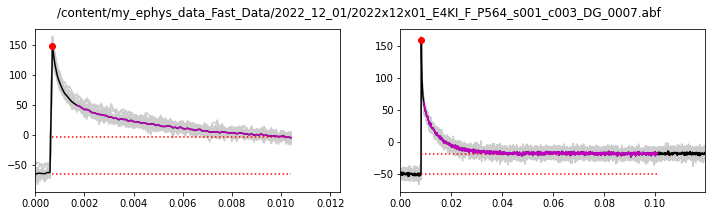

 39%|███▉      | 135/344 [04:10<05:32,  1.59s/it]

<Figure size 432x288 with 0 Axes>

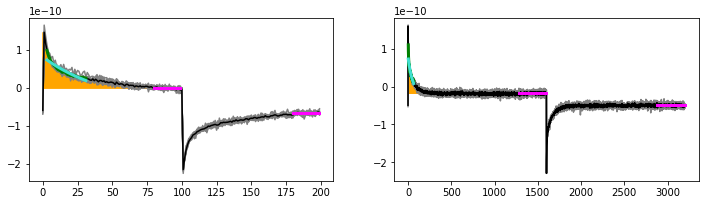

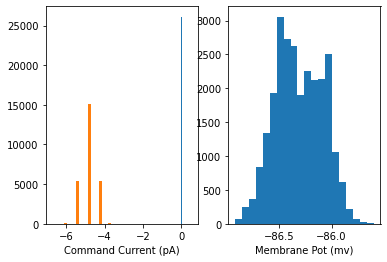

 40%|███▉      | 136/344 [04:11<04:39,  1.35s/it]

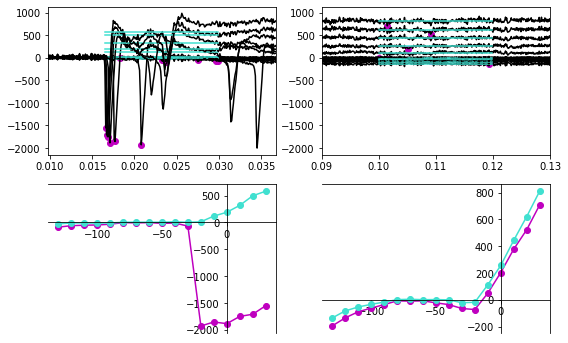

 40%|███▉      | 137/344 [04:12<04:52,  1.41s/it]

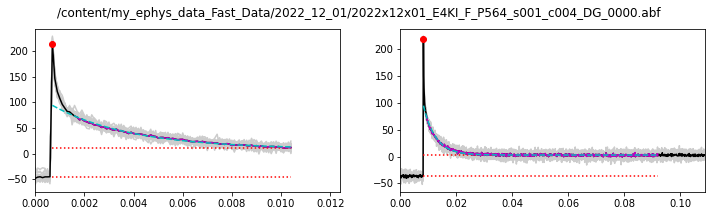

 40%|████      | 138/344 [04:13<04:35,  1.34s/it]

<Figure size 432x288 with 0 Axes>

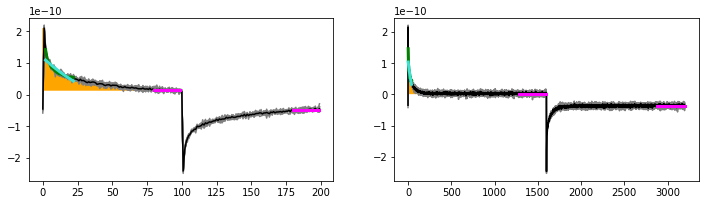

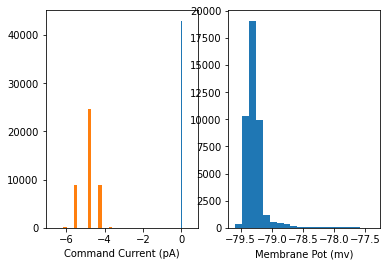

 40%|████      | 139/344 [04:14<04:03,  1.19s/it]

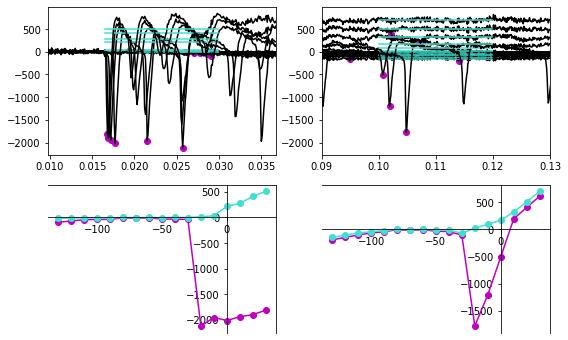

 41%|████      | 140/344 [04:16<04:48,  1.41s/it]

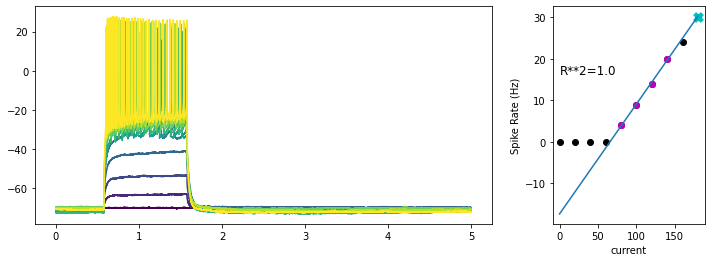

 41%|████      | 141/344 [04:20<07:40,  2.27s/it]

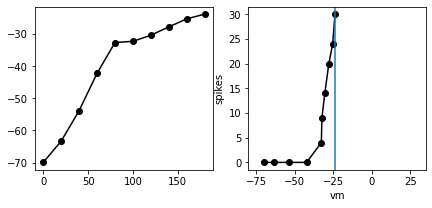

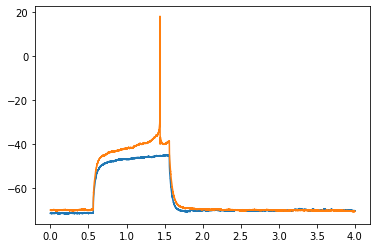

In [ ]:
dataset = {'data_name': 'Fast_Data',
           'data_source': "https://www.dropbox.com/sh/s3hvu2hl27z35x8/AABrX4WaMXgDyi2kXLCKtWqAa?dl=0",
           'file_naming_scheme': ['Rec_date','GenoType','Sex','Age','Slice_Num','Cell_num','Cell_Type'],
           }

Fast_results = ephys_wrapper(dataset,VC_prot,IC_prot,strat_cols=[ 'Cell_Type'])

In [ ]:
Fast_results.keys()
Fast_results['protocol_set']

In [ ]:
reorg_abfs(new_dir='reorg', look_up_name='/content/Fast_Data_Recording_LookUp.csv',data_dir = '/content/my_ephys_data' )

In [ ]:
single_val_strat_groups = ['ap_amplitutude',
                            'Rmp_mV',
                            'Ra_160.0',
                            'Rm_160.0',
                            'Cm_pc_10.0',                    
                            'Cmq_160.0',
                            'Ra_160.0',
                            'Rm_160.0',
                            'Gain_(HzpA)',
                            'Gain_(%pA)',
                            'Rheobase',
                            'AP_thresh_US',
                            'fast_after_hyperpol',
                            'Spike_latency_(ms)',
                            'Input_Resistance_MO']


manual_exclusions = [''] # Dramatic shift in seal at unknown time during recording.
exclusion_overide = [''] # Vm dramatically improved prior to gain recording


strat_df_dict = Fast_results['strat_df_dict'].copy()
file_naming_scheme = ['Rec_date', 'GenoType', 'Sex', 'Age', 'Slice_Num', 'Cell_num', 'Cell_Type']
filtered_dict, fail_dict = final_qc(strat_df_dict,file_naming_scheme,qc_Rmp=-45,qc_AP_amp=40,qc_RR=.35,qc_Ra=65,manual_exclusions=manual_exclusions,exclusion_overide=exclusion_overide)
alt_strat_dict = restratify_results(filtered_dict,file_naming_scheme,single_val_strat_groups)
resp_curve_list = ['IV_Early_(V_stim)','IV_Early_(I_peak)','IV_Steady_State_(I_mean)','Stim_Levels_(pA)','Spike_Counts']
response_curve_data = stratify_response_curve(filtered_dict,resp_curve_list,strat_list=[''])
alt_strat_dict.update(response_curve_data)

write_strat_dfs(alt_strat_dict, dataset['data_name']+'_results_stratified_alternate')